In [1]:
# Intro resource:
# https://rpy2.github.io/doc/v3.4.x/html/introduction.html#creating-an-r-vector-or-matrix-and-filling-its-cells-using-python-code

import numpy as np
import pandas as pd
import rpy2
rpy2.__version__
import rpy2.robjects as robjects
from rpy2.robjects.packages import importr

In [2]:
base = importr('base')
utils = importr('utils')

In [3]:
print(rpy2.robjects.DataFrame)

<class 'rpy2.robjects.vectors.DataFrame'>


In [4]:
# Install and load an R package
import rpy2.robjects.packages as rpackages

# select a mirror for R packages
utils.chooseCRANmirror(ind=1) # select the first mirror in the list

<rpy2.rinterface_lib.sexp.NULLType object at 0x7f9649588f50> [RTYPES.NILSXP]

In [5]:
# install/load ctd
# NOTE: This installs packages in a tempdir.
# Environments with heavy deps should probably install outside of rpy2...
# but weirdly, running this the next day didn't take any time, so maybe there's persistence?

# R package names
packnames = ('ggplot2', 'lazyeval')

# R vector of strings
from rpy2.robjects.vectors import StrVector

# Selectively install what needs to be install.
# We are fancy, just because we can.
names_to_install = [x for x in packnames if not rpackages.isinstalled(x)]
if len(names_to_install) > 0:
    utils.install_packages(StrVector(names_to_install))

In [6]:
# Once we've installed, we can import normally
ggplot = importr("ggplot2")

In [7]:
# Build a dataframe with pandas and make it an R DF. See:
# https://rpy2.github.io/doc/v3.4.x/html/generated_rst/pandas.html
import rpy2.robjects as ro
from rpy2.robjects import pandas2ri
from rpy2.robjects.conversion import localconverter
s_m_data = {'sampleid': ['#q1:types', 's_id_123'],
            'barcodeSequence': ['categorical', 'TACCGCTTCTTC'],
            'isGerbil': ['categorical', 'totally'],
            'someInts': [1, -111],
            'someFloats': [1.1, -111.1]
           }
pd_df = pd.DataFrame(s_m_data, columns=s_m_data.keys())

print(pd_df)


#NOTE: This only works with dataframes that have multiple columns.
# For single-column dfs, I think we must convert from Series, or write directly in R
with localconverter(ro.default_converter + pandas2ri.converter):
    r_df = ro.conversion.py2rpy(pd_df)
    df_summary = base.summary(pd_df)
    
        
    print()
    print(df_summary)

    # We can do the same thing in the opposite direction using the same converter CM
    newpy = ro.conversion.rpy2py(r_df)
    print()
    print("Here's the df converted back to pd:")
    print(type(newpy))
    print(newpy)


    sampleid barcodeSequence     isGerbil  someInts  someFloats
0  #q1:types     categorical  categorical         1         1.1
1   s_id_123    TACCGCTTCTTC      totally      -111      -111.1

   sampleid         barcodeSequence      isGerbil            someInts   
 Length:2           Length:2           Length:2           Min.   :-111  
 Class :character   Class :character   Class :character   1st Qu.: -83  
 Mode  :character   Mode  :character   Mode  :character   Median : -55  
                                                          Mean   : -55  
                                                          3rd Qu.: -27  
                                                          Max.   :   1  
   someFloats     
 Min.   :-111.10  
 1st Qu.: -83.05  
 Median : -55.00  
 Mean   : -55.00  
 3rd Qu.: -26.95  
 Max.   :   1.10  


Here's the df converted back to pd:
<class 'pandas.core.frame.DataFrame'>
    sampleid barcodeSequence     isGerbil  someInts  someFloats
0  #q1:types     catego

In [8]:
# plot using an R package (ggplot2)
points_data = {'ids': ['pt1', 'pt2', 'pt3'],
               'x': [1, 4, 11],
               'y': [2, 8, 22],
           }

# TODO: Does everything play nice if we don't specify an index?
pd_df = pd.DataFrame(points_data, columns=points_data.keys(), index=points_data['ids'])

print(pd_df)


#NOTE: This only works with dataframes that have multiple columns.
# For single-column dfs, I think we must convert from Series, or write directly in R
with localconverter(ro.default_converter + pandas2ri.converter):
    r_df = ro.conversion.py2rpy(pd_df)
    df_summary = base.summary(pd_df)
    
print()
print(df_summary)

from rpy2.robjects import rl
plt = (
    ggplot.ggplot(r_df) +
    ggplot.aes(x=rl('x'),
               y=rl('y'),
               color=rl('ids')) +
    ggplot.geom_point()
)

from rpy2.ipython.ggplot import image_png
image_png(plt)

     ids   x   y
pt1  pt1   1   2
pt2  pt2   4   8
pt3  pt3  11  22

     ids                  x                y        
 Length:3           Min.   : 1.000   Min.   : 2.00  
 Class :character   1st Qu.: 2.500   1st Qu.: 5.00  
 Mode  :character   Median : 4.000   Median : 8.00  
                    Mean   : 5.333   Mean   :10.67  
                    3rd Qu.: 7.500   3rd Qu.:15.00  
                    Max.   :11.000   Max.   :22.00  

$data
    ids  x  y
pt1 pt1  1  2
pt2 pt2  4  8
pt3 pt3 11 22

$layers
list()

$scales
<ggproto object: Class ScalesList, gg>
    add: function
    clone: function
    find: function
    get_scales: function
    has_scale: function
    input: function
    n: function
    non_position_scales: function
    scales: NULL
    super:  <ggproto object: Class ScalesList, gg>

$mapping
Aesthetic mapping: 
<empty>

$theme
list()

$coordinates
<ggproto object: Class CoordCartesian, Coord, gg>
    aspect: function
    backtransform_range: function
    clip: on
    

In [9]:
# We can run cells in R code as well:
# First, load "R magic" extension
%load_ext rpy2.ipython

# then we'll use it. NOTE, the magic call below must be the first line
# of the cell:

     ids                  x                y        
 Length:3           Min.   : 1.000   Min.   : 2.00  
 Class :character   1st Qu.: 2.500   1st Qu.: 5.00  
 Mode  :character   Median : 4.000   Median : 8.00  
                    Mean   : 5.333   Mean   :10.67  
                    3rd Qu.: 7.500   3rd Qu.:15.00  
                    Max.   :11.000   Max.   :22.00  


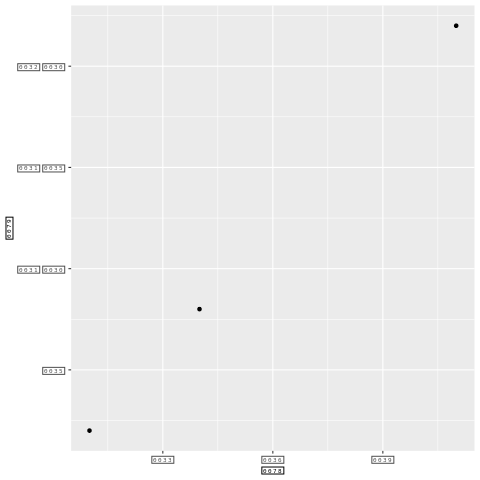

In [10]:
%%R -i r_df
# This cell runs in R.
# the -i flag seems to import data from the python env. Calls below fail
# on missing r_df if it's not here.
R.version.string
print(summary(r_df))

p <- ggplot(r_df) +
     aes(x=x, y=y) +
     geom_point()

print(p)

# TODO: Why are all of the labels super jacked up here?
# They're also broken in the plot produced below by ggsave, so this plot is actually borked

In [11]:
%%R
# NOTE: Here, we don't need to -i p, probably because it was created
# in the R namespace instead of the python namespace.
ggsave(filename='plot.png', plot=p, device = "png")


R[write to console]: Saving 6.67 x 6.67 in image



In [19]:
# Create an R dataframe directly in R, by gluing up a bunch of typed vectors
raw_r_df = ro.DataFrame({'s_ids': ro.StrVector(['s1', 's2', 's3']),
                         'x': ro.IntVector([1, 2, 3]),
                         'y': ro.IntVector([3, 6, 9])})
print(base.summary(raw_r_df))

# We can then convert to pd.DataFrame
with localconverter(ro.default_converter + pandas2ri.converter):
    py_df = ro.conversion.rpy2py(raw_r_df)

py_df

    s_ids                 x             y      
 Length:3           Min.   :1.0   Min.   :3.0  
 Class :character   1st Qu.:1.5   1st Qu.:4.5  
 Mode  :character   Median :2.0   Median :6.0  
                    Mean   :2.0   Mean   :6.0  
                    3rd Qu.:2.5   3rd Qu.:7.5  
                    Max.   :3.0   Max.   :9.0  



,s_ids,x,y
1,s1,1,3
2,s2,2,6
3,s3,3,9
